# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def dice_simulation(n):
    """
    This function simulates the outcome of dice roll in given number 
    """
    # Define the possible outcome of dice
    dice = [1,2,3,4,5,6]
    # Roll the dice n times and save in to list. 
    outcome = []
    # iterate the simulation over n times and save the result in dataframe
    for i in range(n):
        result = random.choice(dice)
        outcome.append(result)
    simulation = pd.DataFrame({"outcome": outcome})
    return simulation 

# generate dataframe called simulated
simulated = dice_simulation(10)
    

#### 2.- Plot the results sorted by value.

,outcome
1,1
2,1
3,1
4,1
5,2
6,2
7,4
8,5
9,5
10,6


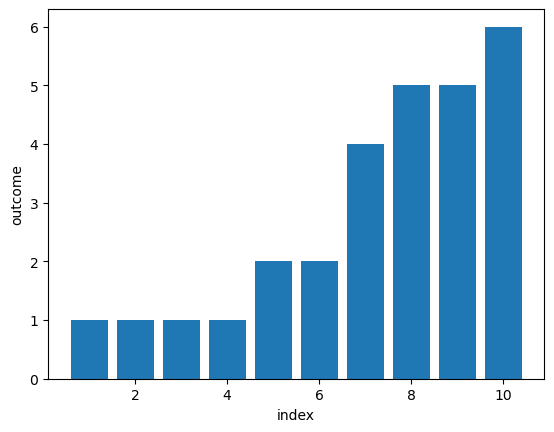

In [4]:
# your code here
# sort the outcome value -->> default ascending,  reset index and drop original index
sorted_df = simulated.sort_values(by = "outcome").reset_index(drop= True)
sorted_df.index += 1
# plot the sorted outcome based on index
plt.bar(sorted_df.index, sorted_df["outcome"])
plt.xlabel("index")
plt.ylabel("outcome")
sorted_df

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

,outcome
1,4
5,2
2,2
4,1
6,1


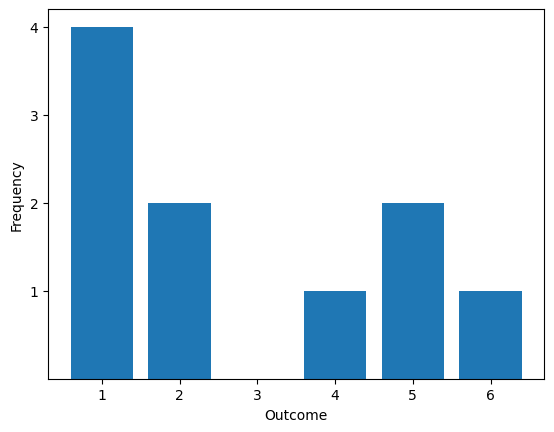

In [5]:
# your code here
freq_dist = pd.DataFrame(simulated["outcome"].value_counts())

plt.bar(freq_dist.index,  freq_dist.outcome)
plt.yticks(range(min(freq_dist.outcome), max(freq_dist.outcome)+1))
plt.xlabel("Outcome")
plt.ylabel("Frequency")

freq_dist


In [6]:
"""
The relation between this plot and the previous plot of the 10 rolls is that the frequency distribution
 plot summarizes the counts of the unique roll results in a single plot, whereas the previous plot showed 
 each individual roll result in a separate plot. The frequency distribution plot is a more compact way 
 of summarizing the information than in the previous plot. Since previous plot doesn't give any idea about the type of data. 
"""

"\nThe relation between this plot and the previous plot of the 10 rolls is that the frequency distribution\n plot summarizes the counts of the unique roll results in a single plot, whereas the previous plot showed \n each individual roll result in a separate plot. The frequency distribution plot is a more compact way \n of summarizing the information than in the previous plot. Since previous plot doesn't give any idea about the type of data. \n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(col):
    """
    This function calculate mean from column of a dataframe
    """
    n = len(col)
    average = sum([val for val in col])/n
    return average


mean(sorted_df["outcome"])

2.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def freq_mean(col):
    """
    This function first calculate frequency distribution of dataframe column and then calculate mean value of that column
    """
    # results the frequency distribution
    freq_dist = col.value_counts()
    
    # calculate the mean from the frequency table
    val, freq = freq_dist.index, freq_dist.values
    mean = sum(val*freq)/sum(freq)
    return freq_dist, mean
freq_mean(sorted_df["outcome"])

(1    4
 2    2
 5    2
 4    1
 6    1
 Name: outcome, dtype: int64,
 2.8)

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def median(col):
    """
    this function return the median value of given dataframe column
    """
    # first sort the columns value by ascending order
    sorted_val = col.sort_values()
    n = len(col)
    # calculate the middle index
    middle_index = (n+1)//2
    # if the count of element in column is even
    if n % 2 == 0:
        value = (sorted_val.iloc[middle_index-1] + sorted_val.iloc[middle_index])/2
    # else for the column with odd numbers of element in column
    else:
        value = sorted_val.iloc[middle_index-1]
    # return the resulting median
    return value

print(median(simulated["outcome"]))
simulated.median()

2.0


outcome    2.0
dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def quartiles(df, col):
    sorted_col = df[col].sort_values()
    n = len(df)
    if n % 2 == 0:
        lower_half = sorted_col.iloc[:n//2]
        upper_half = sorted_col.iloc[n//2:]
    else:
        lower_half = sorted_col.iloc[:n//2]
        upper_half = sorted_col.iloc[n//2+1:]

    Q1 = median(lower_half)
    Q2 = median(sorted_col)
    Q3 = median(upper_half)
    return Q1, Q2, Q3

print(quartiles(simulated, "outcome"))



(1, 2.0, 5)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

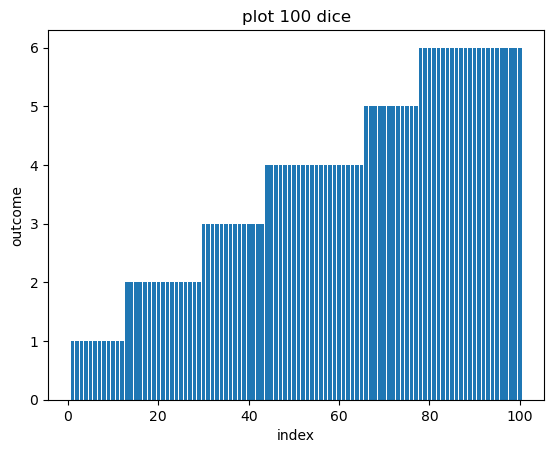

In [11]:
# your code here
roll_dice = pd.read_csv("../data/roll_the_dice_hundred.csv")
sorted = roll_dice["value"].sort_values().reset_index(drop=  True)
sorted.index += 1
plt.bar(sorted.index, sorted.values)
plt.xlabel('index')
plt.ylabel('outcome')
plt.title('plot 100 dice')
plt.show()

In [12]:
"""
With this bar chart we can not much say about the data. 
"""


'\nWith this bar chart we can not much say about the data. \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
mean(roll_dice["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here
frequency_dist = pd.DataFrame(roll_dice["value"].value_counts().sort_index())
frequency_dist.rename(columns = {"index" : "value", "value" : "frequency"}, inplace = True)


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

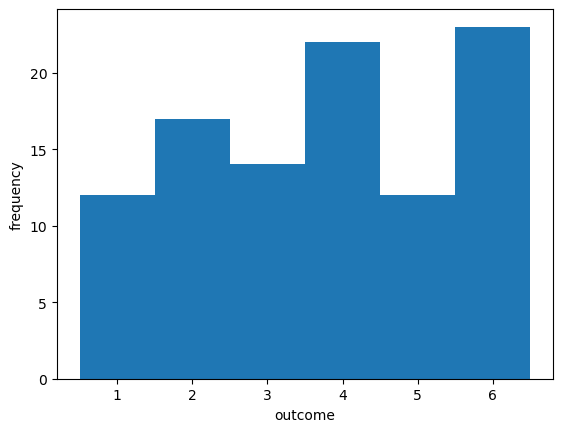

In [15]:
# your code here
#sns.histplot(data = frequency_dist, x = frequency_dist.frequency)# , y = frequency_dist.frequency)
plt.hist(roll_dice["value"],  range = (0.5,6.5), bins = 6)
plt.xlabel("outcome")
plt.ylabel("frequency")
plt.show()

In [16]:
"""
Looking at the histogram the frequency of occurance of higher number is more than the occurance of lower value,
so the mean is higher that the mid point of occurance that is 3, which is represented by mean of 3.74.
"""

'\nLooking at the histogram the frequency of occurance of higher number is more than the occurance of lower value,\nso the mean is higher that the mid point of occurance that is 3, which is represented by mean of 3.74.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

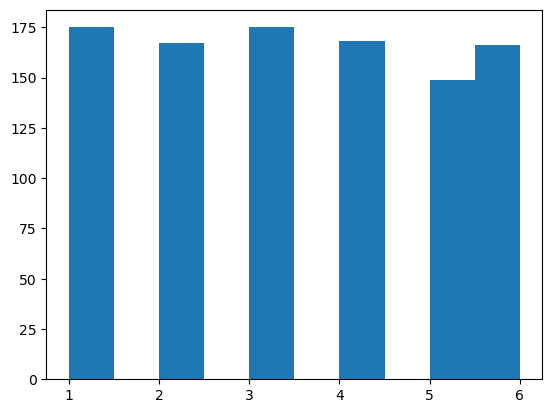

In [17]:
# your code here
roll_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")
plt.hist(roll_thousand["value"])

In [18]:
"""
Moving from 100 to 1000 random roll of dice, the frequency of occurance of each number is almost similar.
"""

'\nMoving from 100 to 1000 random roll of dice, the frequency of occurance of each number is almost similar.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

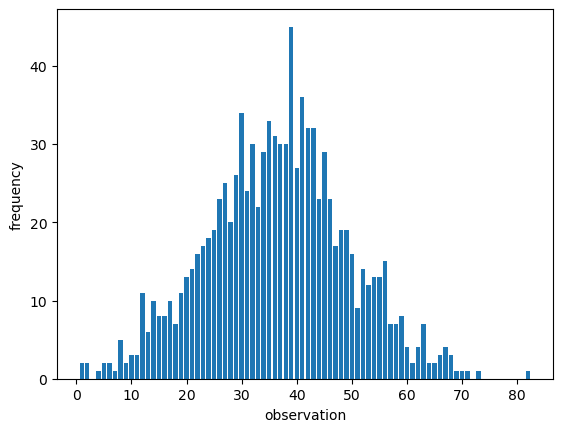

'\nFrom the histogram i can see that observation frequencies are more concerntrate on left side of the mode value of the data. \nConsidering that observation the mean value of this observation lies between 35 to 37 with the standard deviation in a range of 10 to 15.\n'

In [35]:
# your code here
ages  = pd.read_csv("../data/ages_population.csv")
age_freq = ages["observation"].value_counts().sort_index()
plt.bar(age_freq.index, age_freq.values)
plt.xlabel('observation')
plt.ylabel('frequency')
plt.show()



"""
From the histogram i can see that observation frequencies are more concerntrate on left side of the mode value of the data. 
Considering that observation the mean value of this observation lies between 35 to 37 with the standard deviation in a range of 10 to 15.
"""


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
# your code here
print(ages.mean())
print(ages.std())


observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [21]:
"""
They do fall inside my predicted range
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

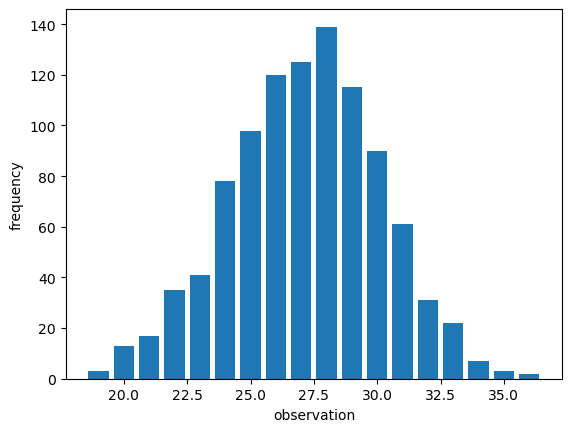

In [52]:
# your code here
ages2 = pd.read_csv("../data/ages_population2.csv")
ages2_freq = ages2["observation"].value_counts().sort_index()
plt.bar(ages2_freq.index, ages2_freq.values)
plt.xlabel('observation')
plt.ylabel('frequency')
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [47]:
"""
Compare to the previous distribution chart this chart shows the observation are more concerntrate 
so it will result in lower mean value and much lower standard deviation than previous chart
"""

'\nCompare to the previous distribution chart this chart shows the observation are more concerntrate \nso it will result in lower mean value and much lower standard deviation than previous chart\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [45]:
# your code here
print(ages2.mean())
print(ages2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [25]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

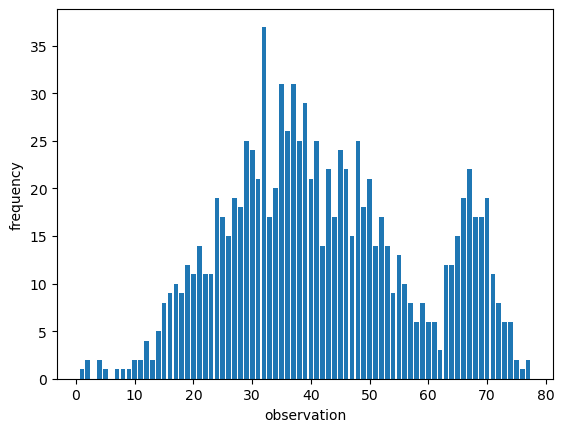

In [53]:
# your code here
ages3 = pd.read_csv("../data/ages_population3.csv")
ages3_freq = ages3["observation"].value_counts().sort_index()
plt.bar(ages3_freq.index, ages3_freq.values)
plt.xlabel('observation')
plt.ylabel('frequency')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [54]:
# your code here
print(ages3.mean())
print(ages3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [28]:
"""
Compared with the plot 1, we can see the frequency disribution of elderrly population in this data is huch higher,
so the frequency distribution plot is skewed towards to the right. Thus our mean is higher than the mode.
Similarly, the range of observation is much wider thus the standard deviation of observation is much larger in this plot compared to first one
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [61]:
# your code here
print(f"The first quartile of the observatin is : {np.quantile(ages3, .25)}")
print(f"The sevond quartile/median of the observatin is : {np.median(ages3)}")
print(f"The third quartile of the observatin is : {np.quantile(ages3, .75)}")
print(f"The fourtn quartile of the observatin is : {np.quantile(ages3, 1)}")


The first quartile of the observatin is : 30.0
The sevond quartile/median of the observatin is : 40.0
The third quartile of the observatin is : 53.0
The fourtn quartile of the observatin is : 77.0


In [30]:
"""
The mean and median of the observation is quiet similar, and distance between first quartile and median is narrowed,
 however the observation is biased towards older ages, with the much wider range.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [31]:
# your code here

In [32]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'